# 1. Data Collection 📊

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.DataFrame(pd.read_csv("housing.csv"))

# 2. Data Exploration and Cleaning 🧹

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Code for Handling Missing Values:

In [7]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Code for Handling Categorical Variables:

In [16]:
# Import necessary libraries (already done in your notebook)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Your existing code to load data and perform initial inspection)
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# Step 1: Convert binary categorical variables to 0s and 1s
# List of binary columns
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define the mapping function
def map_binary(x):
    return x.map({'yes': 1, 'no': 0})

# Apply the mapping to the binary columns
housing[binary_vars] = housing[binary_vars].apply(map_binary)

# Step 2: Handle 'furnishingstatus' using one-hot encoding
# Create dummy variables for 'furnishingstatus'
# drop_first=True avoids multicollinearity (dummy variable trap)
status_dummies = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

# Concatenate the dummy variables to the original DataFrame
housing = pd.concat([housing, status_dummies], axis=1)

# Drop the original 'furnishingstatus' column as it's now encoded
housing.drop('furnishingstatus', axis=1, inplace=True)

print("DataFrame after handling categorical variables:")
print(housing.head())
print(housing.info())

DataFrame after handling categorical variables:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0           False        False  
1           False        False  
2          

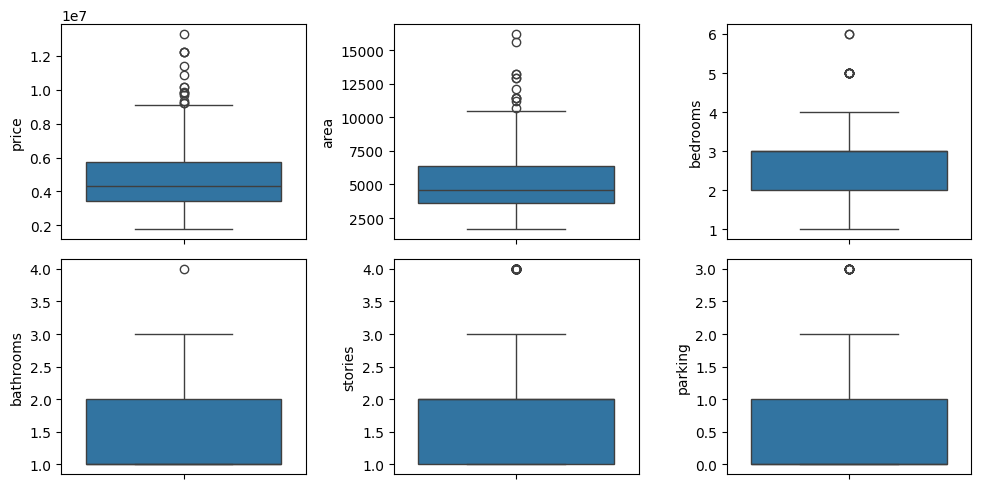

In [30]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

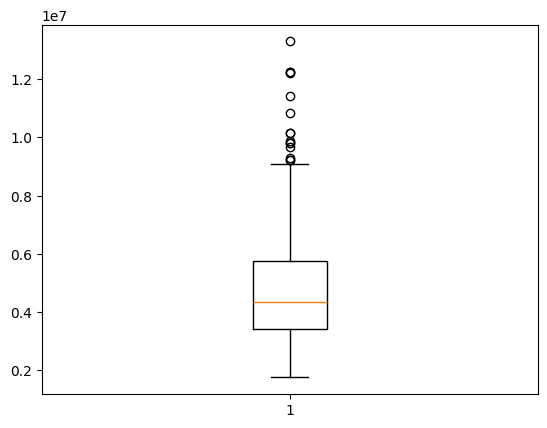

In [31]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

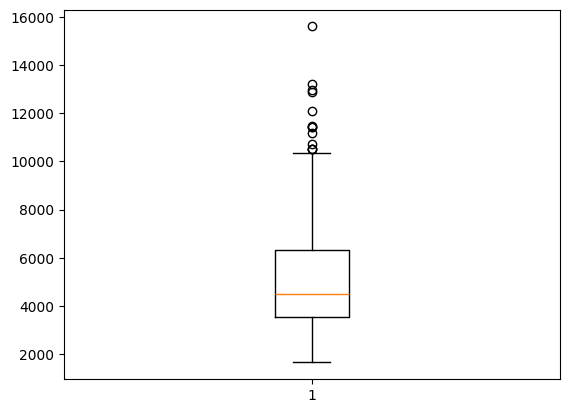

In [32]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

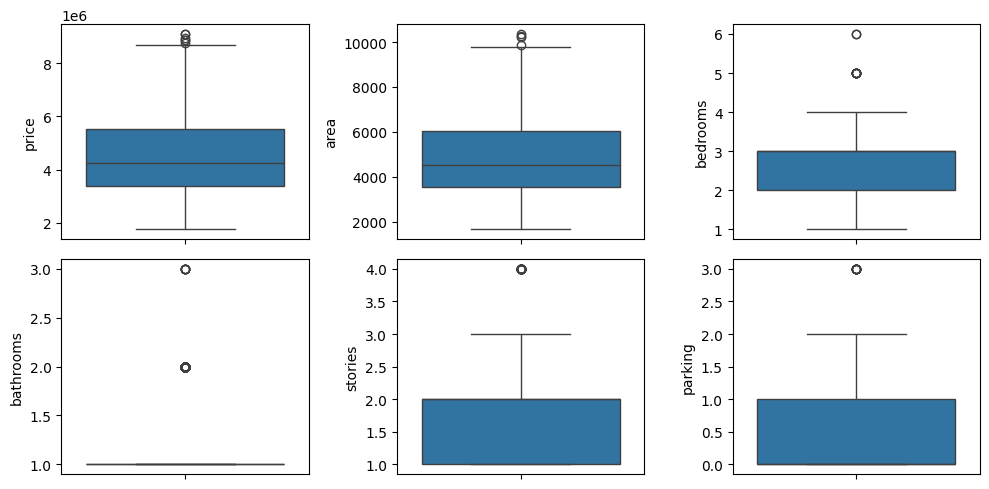

In [33]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])
plt.tight_layout()

# 3.Feature Selection 🔎

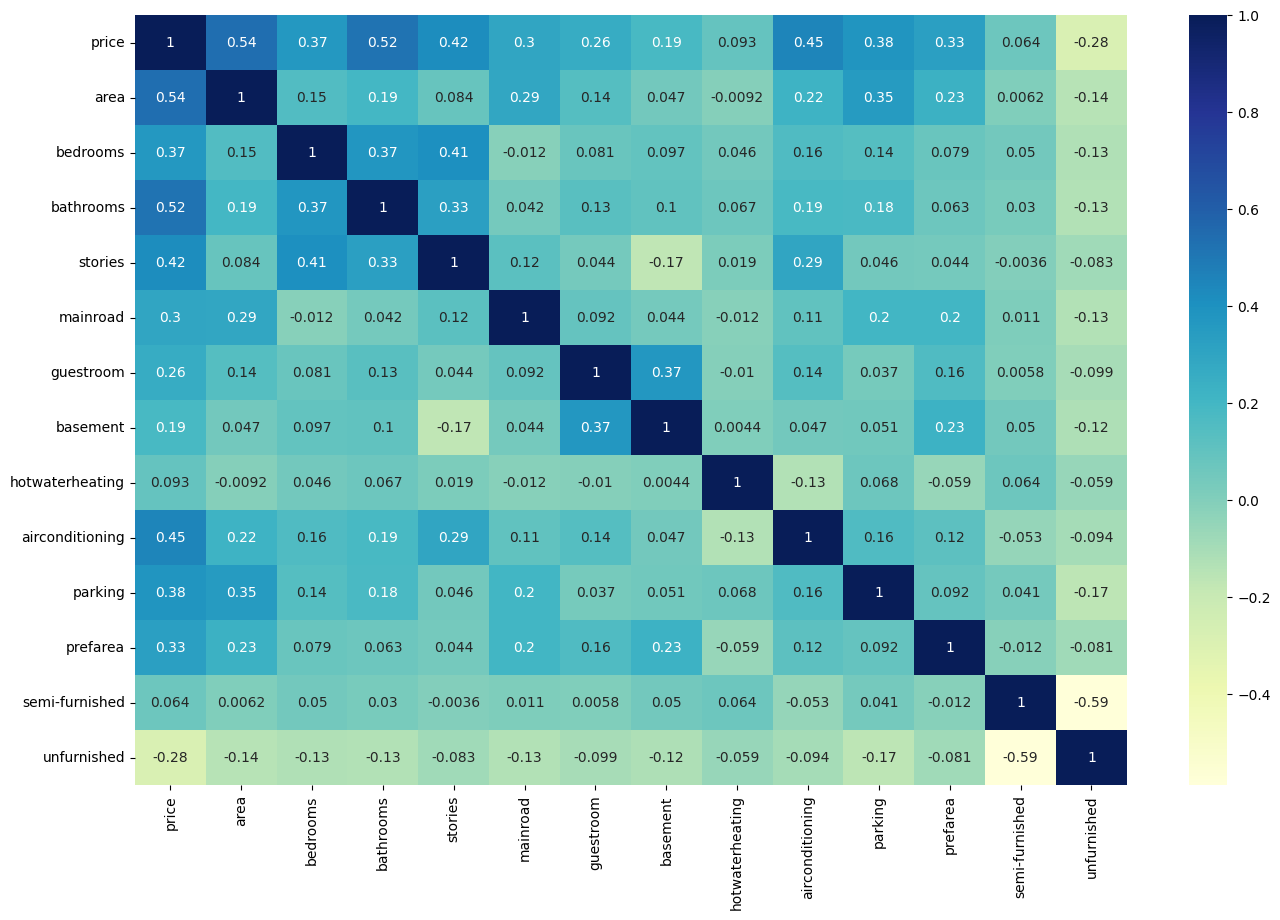

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(housing.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
X = housing.drop('price', axis=1)
y = housing['price']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (545, 13)
Target (y) shape: (545,)


# 4. Model Training 🤖

In [19]:
# Import necessary libraries for model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler # Important for scaling numerical features
scaler = MinMaxScaler()
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [20]:
# Fit and transform the numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Features (X) after scaling numerical columns:")
print(X.head())

Features (X) after scaling numerical columns:
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.396564       0.6   0.333333  0.666667         1          0         0   
1  0.502405       0.6   1.000000  1.000000         1          0         0   
2  0.571134       0.4   0.333333  0.333333         1          0         1   
3  0.402062       0.6   0.333333  0.333333         1          0         1   
4  0.396564       0.6   0.000000  0.333333         1          1         1   

   hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
0                0                1  0.666667         1           False   
1                0                1  1.000000         0           False   
2                0                0  0.666667         1            True   
3                0                1  1.000000         1           False   
4                0                1  0.666667         0           False   

   unfurnished  
0        False  
1     

In [21]:
# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(f"Training data shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing data shape: X_test {X_test.shape}, y_test {y_test.shape}")

Training data shape: X_train (381, 13), y_train (381,)
Testing data shape: X_test (164, 13), y_test (164,)


In [22]:
# Initialize and train the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
print("\nModel training complete.")
print(f"Intercept: {lm.intercept_}")
print("Coefficients:", lm.coef_)


Model training complete.
Intercept: 1937017.511941853
Coefficients: [3470238.87773479  539783.82594751 3306011.76239801 1253355.53650046
  582598.5948759   351446.41266487  249420.88372685  980170.7795319
  772474.78155136  701493.11340649  686391.97250684   10632.01549999
 -358114.78809404]


In [23]:
# You can also display the coefficients with their respective feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lm.coef_})
print("\nCoefficients for each feature:")
print(coefficients_df)


Coefficients for each feature:
            Feature   Coefficient
0              area  3.470239e+06
1          bedrooms  5.397838e+05
2         bathrooms  3.306012e+06
3           stories  1.253356e+06
4          mainroad  5.825986e+05
5         guestroom  3.514464e+05
6          basement  2.494209e+05
7   hotwaterheating  9.801708e+05
8   airconditioning  7.724748e+05
9           parking  7.014931e+05
10         prefarea  6.863920e+05
11   semi-furnished  1.063202e+04
12      unfurnished -3.581148e+05


# 5. Model Evaluation 📈

In [24]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Evaluate on training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R-squared (R2): {r2_train:.4f}")

Training Set Metrics:
Mean Squared Error (MSE): 1052689125697.37
R-squared (R2): 0.6815


In [40]:
# Evaluate on test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R-squared (R2): {r2_test:.4f}")


Test Set Metrics:
Mean Squared Error (MSE): 1283969782447.75
R-squared (R2): 0.6730


# 6. Visualization 📊

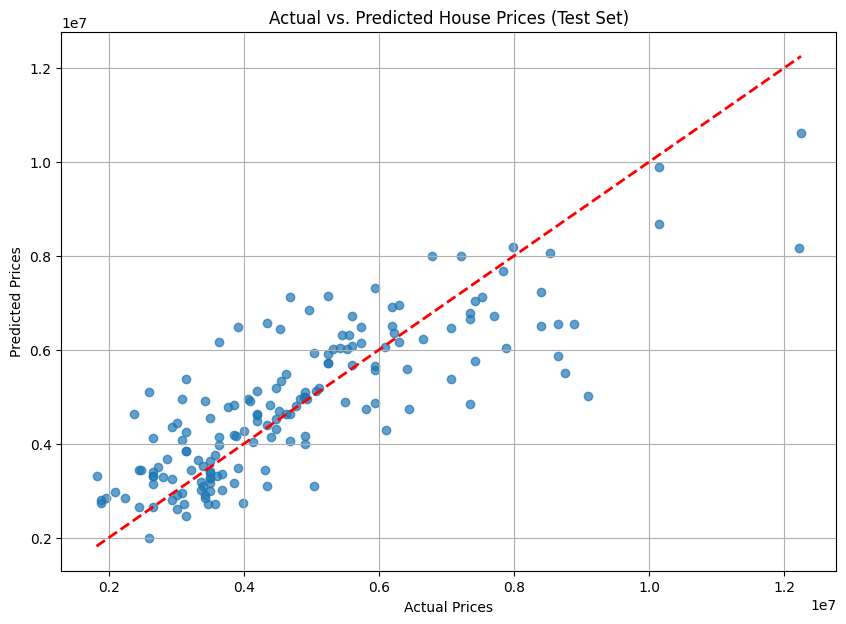

In [27]:
# Create a scatter plot of actual vs. predicted values for the test set
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (Test Set)")
plt.grid(True)
plt.show()

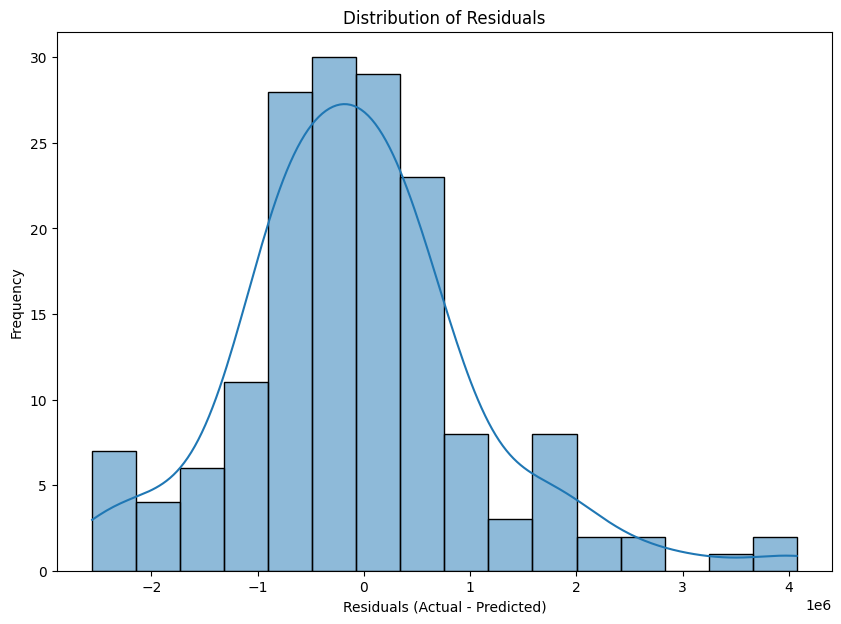

In [28]:
# Plotting the residuals (errors)
# Residual = Actual Value - Predicted Value
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

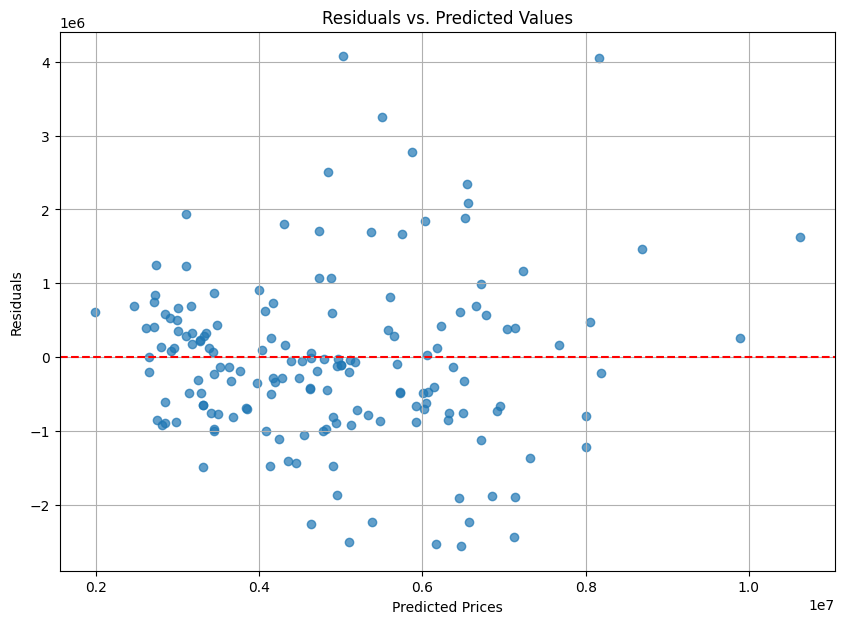

In [29]:
# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()